In [1]:
###------------------
### Import statements
###------------------

import sys
import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_blobs, load_digits
from sklearn.metrics import euclidean_distances

from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir ="iris.csv"

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x500 with 0 Axes>

In [3]:
data_df=pd.read_csv(os.path.join(inpDir,moduleDir,'/home/hpcsap/AI_and_openvino/directory_env/inputs/iris.csv'))
data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/hpcsap/AI_and_openvino/directory_env/inputs/iris.csv'

In [ ]:
def fn_plot_decision_boundary(pred_func, X, y, ax = None):
    '''
        Attrib:
           pred_func : function based on predict method of 
                    the classifier
           X : feature matrix
           y : targets
       Return:
           None
    '''
    if ax is None:
        ax = plt.gca()
        
    # Set min and max values and give it some padding
    xMin, xMax = X[:, 0].min() - .05, X[:, 0].max() + .05
    yMin, yMax = X[:, 1].min() - .05, X[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.05
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP, alpha = 0.6)
    
    # plot the points as well
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=CMAP, edgecolors='black')

In [ ]:
def fn_plot_svc_decision_function(clf):
    
    """Plot the decision function for a 2D SVC"""
    
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #print (clf.decision_function(np.array([xi, yj]).reshape(1, -1))[0])
            P[i, j] = clf.decision_function(np.array([xi, yj]).reshape(1, -1))[0]
    return plt.contour(X, Y, P, colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])

In [ ]:
#Make predictions using Support Vector Machines
from sklearn.svm import SVC
clf = SVC(kernel='linear')

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=RANDOM_STATE, cluster_std=0.60)

clf.fit(X,y)

SVC(kernel='linear')

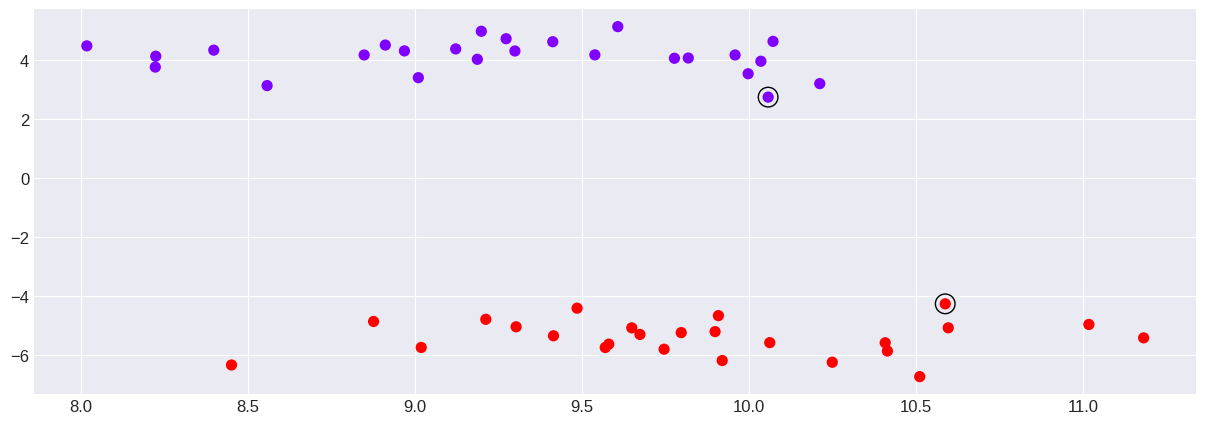

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap=CMAP)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:,1],
            s=200, edgecolors='k',facecolor='none');
#fn_plot_svc_decision_function(clf);

# DATA SETS 

In [ ]:
# CSV file name
iris_file = os.path.join(inpDir, moduleDir, '/home/hpcsap/AI_and_openvino/directory_env/inputs/iris.csv')

# Define feature names

iris_features = ['sepal length',
                 'sepal width',
                 'petal length',
                 'petal width',
                 'target']
# Read the CSV file
iris_df = pd.read_csv(iris_file, sep=',', skiprows=1, 
                      header=None, names = iris_features)

target_names = ['setosa','versicolor','virginica']

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])

iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
features =iris_df.drop('target',axis=1)
labels =iris_df['target']

# Parameter Tuning

In [ ]:
# For convenience, create a function to plot
def plot_hyplane(classifier, features, labels, i):
    plt.subplot(1, 3, i )
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    pred = classifier.predict(features)
    
    x_min, x_max = features[:, 0].min() - .1, features[:, 0].max() + .1
    y_min, y_max = features[:, 1].min() - .1, features[:, 1].max() + .1

    xx, yy = np.meshgrid ( np.linspace ( x_min, x_max, 1000 ),
                       np.linspace ( y_min, y_max, 1000))
    Z = classifier.predict ( np.c_[ xx.ravel(), yy.ravel()])

    # Plot the decision surface
    Z = Z.reshape( xx.shape )
    plt.grid(False)
    plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Set3 ) # refer http://matplotlib.org/users/colormaps.html

    # Plot also the training points
    plt.scatter( features [ :, 0], features [ :, 1], c = labels,
            cmap=plt.cm.flag)

    plt.axis('tight')
    

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

C Value

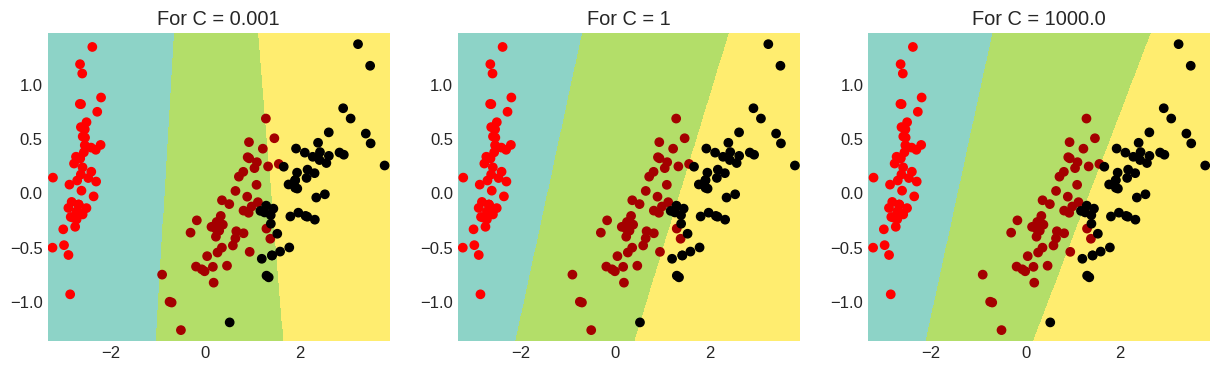

In [ ]:
plt.figure( figsize = (15,4) )
C_values = [1e-3, 1, 1e3]

i = 1

for C in C_values:
    clf = SVC(kernel='linear', C = C)
    clf.fit(pca_features, labels)

    plot_hyplane(clf, pca_features, labels, i)
    i +=1
    plt.title('For C = {}'.format(C))
    
#plt.savefig('../images/22_svm_C.jpg')
plt.show()

KERNEL

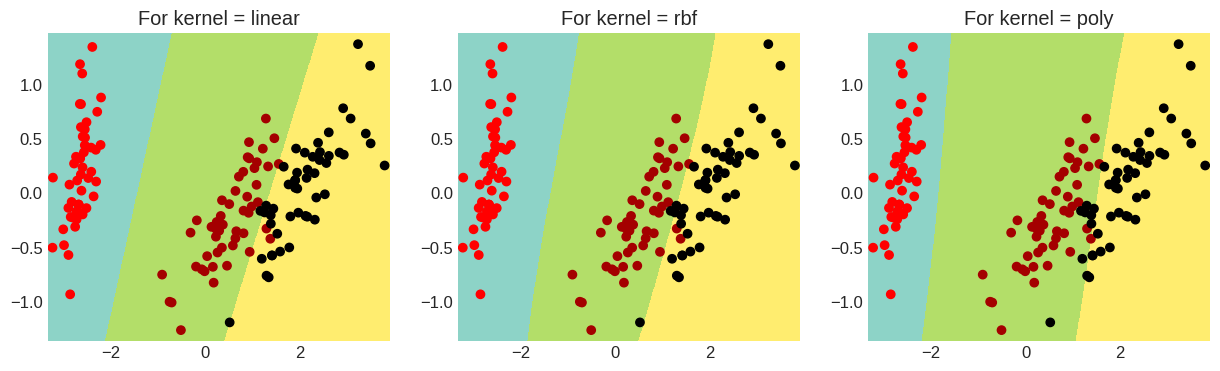

In [ ]:
plt.figure( figsize = (15,4) )
kernels = ['linear', 'rbf', 'poly']

i = 1

for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(pca_features, labels)

    plot_hyplane(clf, pca_features, labels, i)
    i +=1
    plt.title('For kernel = {}'.format(k))
    plt.axis('tight')
#plt.savefig('../images/22_svm_kernel.jpg')
plt.show()

GAMMA

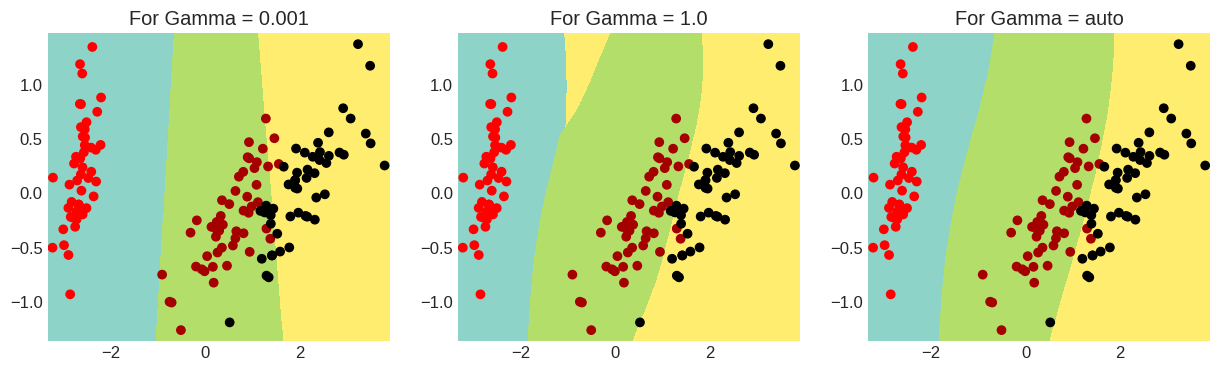

In [ ]:
plt.figure( figsize = (15,4) )
gammas = [1e-3, 1.0, 'auto']

i = 1

for g in gammas:
    clf = SVC(kernel='rbf', gamma = g)
    clf.fit(pca_features, labels)

    plot_hyplane(clf, pca_features, labels, i)
    i +=1
    plt.title( 'For Gamma = {}'.format(g))
    plt.axis('tight')
#plt.savefig('../images/22_svm_gamma.jpg')
plt.show()

# WOrking on digits data

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
features_df = pd.DataFrame(digits.data,columns=digits.feature_names)
features_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
labels=digits.target
labels

array([0, 1, 2, ..., 8, 9, 8])

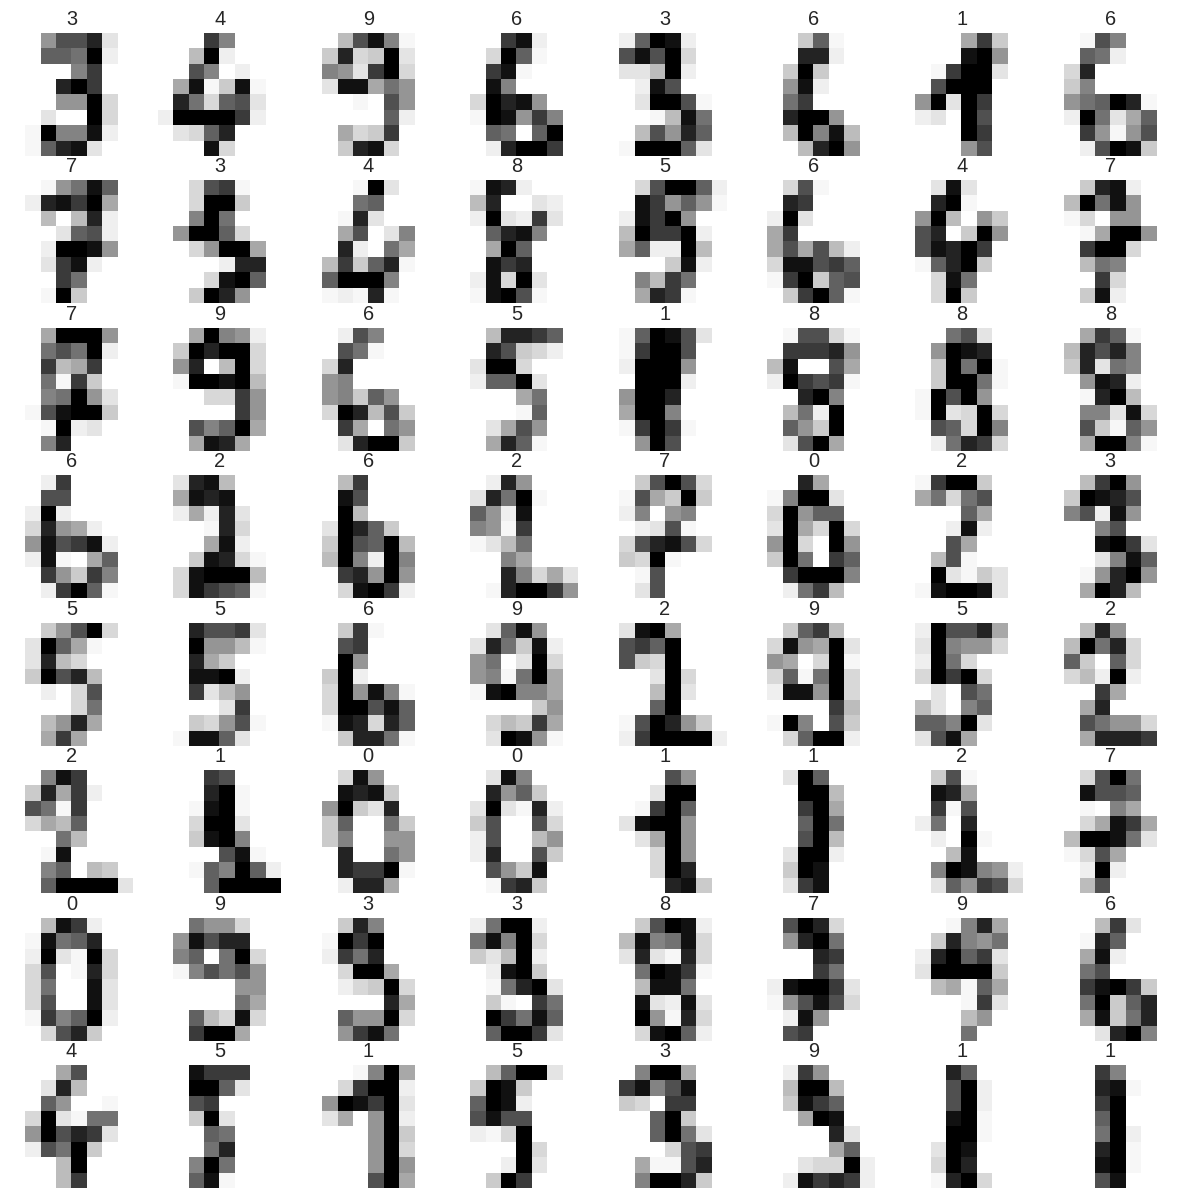

In [ ]:
fig, axes = plt.subplots(8,8,figsize =(15,15))
axes = axes.ravel()
plot_df = features_df.sample(64)
for count,(idx, row) in enumerate(plot_df.iterrows()):
    #print(count,idx,row.to_numpy())
    ax=axes[count]
    ax.imshow(row.to_numpy().reshape(8,8))
    ax.axis(False)
    ax.set_title(labels[idx])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, 
                                                    stratify=labels,
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'features_df' is not defined

In [10]:
#plt.figure( figsize = (15,4) )
kernels = ['linear', 'rbf', 'poly']

for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred =clf.predict(X_test)
    #acc = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test , y_pred, average='weighted')
   
    print (f'Accuracy = {acc:.5f} | F1 Score ={f1:.5f}')



NameError: name 'X_train' is not defined

In [ ]:
#plt.figure( figsize = (15,4) )
fig,axes=plt.subplots(1,3,figsize=(15,8) )
plt.figure(figsize=(156,4))

kernels = ['linear', 'rbf', 'poly']

for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred =clf.predict(X_test)
    acc = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test , y_pred, average='weighted')
    print (f'Accuracy = {acc:.5f} | F1 Score ={f1:.5f}')
    
    # cm=confusion_matrix(y_test, y_pred)
    #disp= ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=digits.target_names)
    
    #disp.plot(cmap=plt.cm.Blues, colorbar=False, ax = axes[i])
    #i +=1
   # plt.show

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:

# svc_clf=SVC(kernels ='rbf') #Instantiate the classifier
# distributions = dict( C= [0.001,0.01,1,100,100],gamma = [le=3,1.0,'auto'])
# clf = RandomizedSearchCV(svf_clf,distributions, random_state=RANDOM_STATE)
# search = clf.fit(X_train,y_train)
# search.best_params_
# {'gamma':0.001, 'C':1}
# fig.ax=plt.subplots(1,11 figsize(4,4))
# clf =SVC(kernel='rbf', gamma =0.001, C=1)
# clf.fit(X_train, y_train)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3540596696.py, line 2)